In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import sklearn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder


In [15]:
lb = LabelEncoder()

In [16]:
df_train = pd.read_csv("../data/fraud_detection/train.csv",nrows=100000)
df_train['click_time'] = lb.fit_transform(df_train['click_time'])
df_train = df_train.dropna(axis=1)
df_train.head()

,ip,app,device,os,channel,click_time,is_attributed
0,83230,3,1,13,379,0,0
1,17357,3,1,19,379,1,0
2,35810,3,1,13,379,2,0
3,45745,14,1,13,478,3,0
4,161007,3,1,13,379,4,0


In [17]:
X = df_train.iloc[:,df_train.columns!='is_attributed']
Y =  df_train.iloc[:,-1]


In [18]:
split = int(0.8*X.shape[0])

X_train = X[:split]
Y_train = Y[:split]

X_test = X[:split]
Y_test = Y[:split]

print X_train.shape, Y_train.shape
print X_test.shape, Y_test.shape

(80000, 6) (80000,)
(80000, 6) (80000,)


In [19]:
rfc = RandomForestClassifier()

In [20]:
rfc.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc.score(X_test,Y_test)

0.99955

In [22]:
predicted_rfc = rfc.predict(X_test)

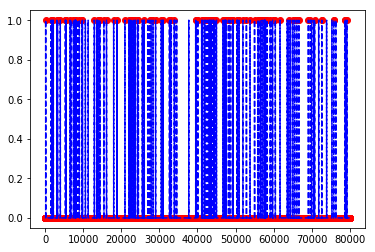

In [24]:
plt.plot(predicted_rfc,'ro',Y_test,'b--')